# Extreme Gradient Boosting (XGBoost) Ensemble in Python

**Extreme Gradient Boosting (XGBoost)** es una librería *open-source* que provee una implementación efectiva y eficiente del algoritmo *gradient boosting*.

Poco después de su desarrollo, XGBoost se convirtió en el método *go-to* y, a menudo, el componente clave en las soluciones ganadoras en competencias de problemas de clasificación y regresión.

## 1. Extreme Gradient Boosting Algorithm

**Gradient boosting** se refiere a una clase de algoritmos de *machine learning* que pueden ser utilizados para problemas de clasificación o regresión.

Los *ensembles* son construidos a partir de árboles de decisión. Los árboles se agregan uno por uno al *ensemble* y son entrenados para corregir errores en las predicciones realizadas por modelos anteriores. Este es un tipo de *ensemble machine learning model* conocido como **boosting**.

Los modelos son entrenados utilizando cualquier función de pérdida arbitrariamente diferenciable y el algoritmo de optimización *gradient descent*. Esto le da a la técnica su nombre, *gradient boosting*, puesto qe la pérdida del gradiente es minimizada conforme el modelo es entrenado, similar a una red neuronal.

Las dos razones principales para utilizar XGBoost son la rapidez de ejcución y el rendimiento del modelo. XGBoost domina los *datasets* estructurados o tabulados en problemas predictivos de clasificación o regresión. Una prueba de esto es que es el algoritmo *go-to* de los ganadores de competencias en Kaggle.

## 2. XGBoost Scikit-Learn API

XGBoost puede ser instalado como una librería *standalone* y un modelo XGBoost puede ser desarrollado utilizando el API *scikit-learn*. El primer paso es instalar la librería XGBoost, mediante el pip python manager:

In [ ]:
sudo pip install xgboost

Se puede confirmar si se instaló correctamente con el siguiente script.

In [1]:
# check xgboost version
import xgboost
print(xgboost.__version__)

0.90


La librería XGBoost tiene su propio API, pero en este tutorial, vamos a usar el método a través de las *wrapper classes* de *scikit-learn*: **XGBRegressor** y **XGBClassifier**. Se utiliza aleatoriedad en la construcción del modelo, por lo que en cada ejecución, se tendrá una salida ligeramente diferente.

### a. XGBoost Ensemble for Classification

Primeramente, se puede invocar a la función **make_classification()** para crear un *synthetic binary classification problem* con 1000 ejemplos y 20 variables de entrada.

In [3]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Seguidamente, se evalúa el modelo utilizando **repeated stratified k-fold cross-validation**, con 3 *repeats* y 10 *folds*. 

In [4]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.899 (0.029)


En este caso, el *XGBoost ensemble*, con hiperparámetros por defecto, alcanzó una precisión en la clasificación cercana al 90%. 

También, se pueden realizar predicciones con la función **predict()**. Esta función espera siempre un arreglo NumPy como una matriz con una fila por cada variable de entrada.

In [5]:
# make predictions using xgboost for classification
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


### b. XGBoost Ensemble for Regression

Nuevamente, se puede utilizar la función **make_regresion()** para crear un *synthetic regression problem* con 1000 ejemplos y 20 variables de entrada.

In [6]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


Luego, se evalúa el modelo utilizando **repeated k-fold cross-validation**, con 3 *repeats* y 10 *folds*. Se reportará el mean absolute error (MAE) del modelo a lo largo de todas las repeats y folds. La librería scikit-learn toma el MAE negativo, por lo que es maximizado en lugar de minimizado. Esto significa que los MAE más negativos son mejores, y un modelo perfecto tiene un MAE de 0.

In [7]:
# evaluate xgboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -62.762 (3.219)


En este caso, el *XGBoost ensemble* con hiperparámetros por defecto alcanza un MAE cercano a 63.

También, se pueden realizar predicciones con la función **predict()**, que espera un arreglo NumPy como parámetro.

In [8]:
# gradient xgboost for making predictions for regression
from numpy import asarray
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = XGBRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
row = asarray([row])
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

[16:57:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Prediction: 28


## 3. XGBoost Hyperparameters

En esta sección, se analizarán algunos hiperparámetros que se deben considerar en el *Gradient Boosting ensemble* y su efecto en el rendimiento del modelo.

### a. Explore Number of Trees

Los árboles de decisión son añadidos al modelo secuencialmente, para corregir e improvisar en las predicciones realizadas por árboles anteriores. Por ende, por lo general, más árboles es mejor.

El número de árboles se puede determinar con el argumento *n_estimators*, con un valor por defecto de 100. El siguiente ejemplo explora el efecto del número de árboles con valores entre 10 y 5000.

>10 0.829 (0.037)
>50 0.871 (0.027)
>100 0.899 (0.029)
>500 0.927 (0.025)
>1000 0.927 (0.025)
>5000 0.927 (0.026)


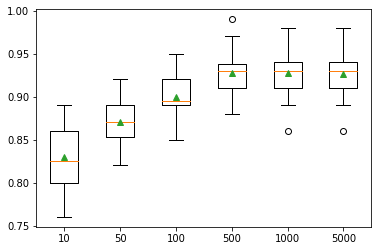

In [1]:
# explore xgboost number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000, 5000]
	for n in trees:
		models[str(n)] = XGBClassifier(n_estimators=n)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Como se puede apreciar, el rendimiento mejora en el *dataset* hasta aproximadamente 500 árboles, para luego estabilizarse o descender.

### b. Explore Tree Depth

La profunidad del árbol determina qué tan especializado es un árbol para el *dataset*: qué tan general u *overfit* es. Los árboles se prefieren no demasiado generales (como **AdaBoost**) pero tampoco demasiado profundos o especializados (como **bootstrap aggregation**).

Este hiperparámetro se controla con el argumento *max_depth*, que por defecto es 6. El siguiente ejemplo explora la profundidad del árbole entre 1 y 10 y su efecto en el rendimiento del modelo.

>1 0.833 (0.029)
>2 0.874 (0.031)
>3 0.899 (0.029)
>4 0.916 (0.030)
>5 0.922 (0.030)
>6 0.923 (0.030)
>7 0.920 (0.026)
>8 0.916 (0.032)
>9 0.919 (0.028)
>10 0.918 (0.029)


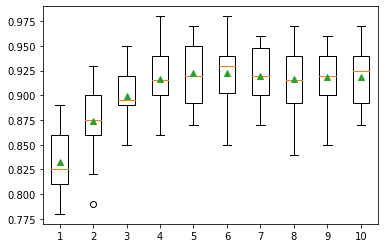

In [2]:
# explore xgboost tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = XGBClassifier(max_depth=i)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En este caso, se puede observar que el rendimiento mejora con la profunidad del árbol, alcanzando una cima entre 4 y 7, para luego descender debido a los árboles demasiado especializdos.

### c. Explore Learning Rate

El *learning rate* controla el tamaño de la contribucion de cada modelo al *ensemble prediction*. Puede ser controlado con el argumento *eta* y su valor por defecto es 0.3 .

El siguiente ejemplo explora el *learning rate* y compara el efecto de los valores entre 0.0001 y 1.0 .

>0.0001 0.899 (0.029)
>0.0010 0.899 (0.029)
>0.0100 0.899 (0.029)
>0.1000 0.899 (0.029)
>1.0000 0.899 (0.029)


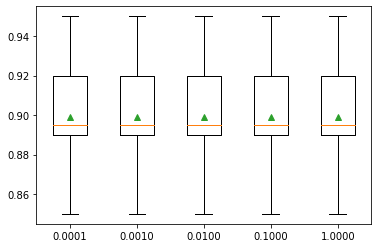

In [5]:
# explore xgboost learning rate effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = XGBClassifier(eta=r)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En este caso, se observa cómo un *learning rate* mayor resulta en un mejor rendimiento en este *dataset*. Se esperaría que añadir más árboles al *ensemble* para los *smaller learning rates* mejorarían aún más el rendimiento. Este *trade-off* entre el número de árboles (*speed of training*) y *learning rate*, e.g., se puede entrenar un modelo más rápido al usar menos árboles y un *learning rate* más grande. 

### d. Explore Number of Samples

El número de *samples* utilizados para entrenar cada árbol puede ser variado. Esto significa que cada árbol es *entrenado* en un subconjunto seleccionado aleatoriamente del *training dataset*.

Al usar menos *samples* se introduce más varianza para cada árbol, aunque puede mejorar el rendimiento de todo el modelo. El número de *samples* utilizados para entrenar cada árbol es especificado por el argumento *subsample* y se le puede asignar una fracción del tamaño del *training dataset*. Por defecto, es 1.0, para utilizar todo el *training dataset*.

El siguiente ejemplo demuestra el efecto del tamaño de la muestra en el rendimiento del modelo, con *ratios* variando de 10% hasta 100%.

>0.1 0.882 (0.034)
>0.2 0.903 (0.028)
>0.3 0.909 (0.030)
>0.4 0.913 (0.031)
>0.5 0.914 (0.026)
>0.6 0.908 (0.029)
>0.7 0.910 (0.025)
>0.8 0.911 (0.029)
>0.9 0.906 (0.028)
>1.0 0.899 (0.029)


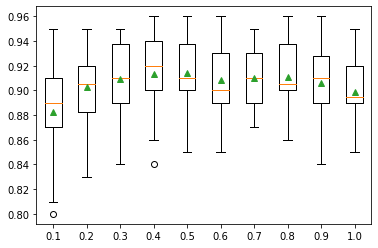

In [6]:
# explore xgboost subsample ratio effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(subsample=i)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Como se puede apreciar, el rendimiento miedo es probablemente mejor para un *sample size* que cubre la mayoría del *dataset*, como 80% o mayor.

### e. Explore Number of Features

Cambiar el número de *features* introduce varianza adicional al modelo, que puede mejorar el rendimiento, aunque necesita un aumento en el número de árboles.

El número de *features* usado por cada árbol se toma como una muestra aleatoria y se especifica con el argumento *colsample_bytree* y pone por defecto todas las *features* en el *training dataset*; e.g., 100% o un valor de 1.0 . También se pueden muestrear columnas por cada *split*, y esto es controlado por el argumento *colsample_bylevel*, pero no se tomará en cuenta este hiperparámetro aquí.

El siguiente ejemplo el efecto del número de *features* en el rendimiento del modelo, con valores variando de 10% a 100%, en incrementos de 10%.

>0.1 0.845 (0.038)
>0.2 0.883 (0.031)
>0.3 0.893 (0.032)
>0.4 0.901 (0.033)
>0.5 0.900 (0.033)
>0.6 0.903 (0.026)
>0.7 0.902 (0.028)
>0.8 0.902 (0.026)
>0.9 0.898 (0.028)
>1.0 0.899 (0.029)


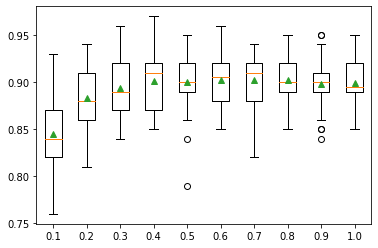

In [7]:
# explore xgboost column ratio per tree effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = XGBClassifier(colsample_bytree=i)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En este caso, se puede observar que el rendimiento medio incrementa  cerca de la mitad de los *features* (50 porciento) y se estabiliza en algún nivel después de eso. Es sorprendente que, al remover la mitad de las variables de entrada por árbol tiene poco efecto. La tendencia al alza alcanza una cima, aproximadamente, en 0.6 .